In [ ]:

    $( document ).ready(code_toggle);

In [2]:
import os
os.environ['SKIMAGE_DATADIR'] = '/tmp/.skimage_cache'

In [19]:
from skimage.io import imread, imshow
from skimage.transform import downscale_local_mean

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Chapter 1: When I saw his face in red, green, and blue

I thought today was going to be a normal day. A day like any other. Boy, was I so wrong.

I went to class, like I always do. But today, I learned more than just about digital images. I learned about *him*. 

## Gino: A Digital Portrait

Even in numbers (which is what digital pictures were made up of, an array of values), the sight of him was beautiful.

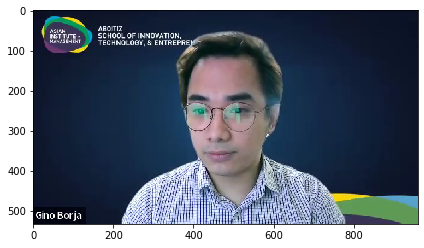

In [9]:
gino1 = imread('images/gino1.png')
imshow(gino1);

In [12]:
gino1

array([[[ 19,  21,  36],
        [ 19,  21,  36],
        [ 19,  21,  36],
        ...,
        [ 19,  21,  38],
        [ 19,  21,  38],
        [ 19,  21,  38]],

       [[ 15,  17,  35],
        [ 15,  17,  35],
        [ 15,  17,  35],
        ...,
        [ 13,  17,  34],
        [ 13,  17,  34],
        [ 13,  17,  34]],

       [[ 13,  15,  32],
        [ 13,  15,  32],
        [ 13,  15,  32],
        ...,
        [ 13,  17,  34],
        [ 13,  17,  34],
        [ 13,  17,  34]],

       ...,

       [[  0,   4,  12],
        [  0,   4,  12],
        [  0,   4,  12],
        ...,
        [ 96, 154,  89],
        [ 96, 154,  89],
        [ 96, 154,  89]],

       [[  0,   4,  12],
        [  0,   4,  12],
        [  0,   4,  12],
        ...,
        [ 96, 154,  89],
        [ 96, 154,  89],
        [ 96, 154,  89]],

       [[  0,   3,  14],
        [  0,   3,  14],
        [  0,   3,  14],
        ...,
        [ 96, 155,  87],
        [ 96, 155,  87],
        [ 96, 155,  87]]

## The RGB's and HSV's of You

Usually made up of three channels, images were defined by their reds, greens, and blues.

In [13]:
gino1.shape

(533, 960, 3)

The three Gino's: red, green, and blue.

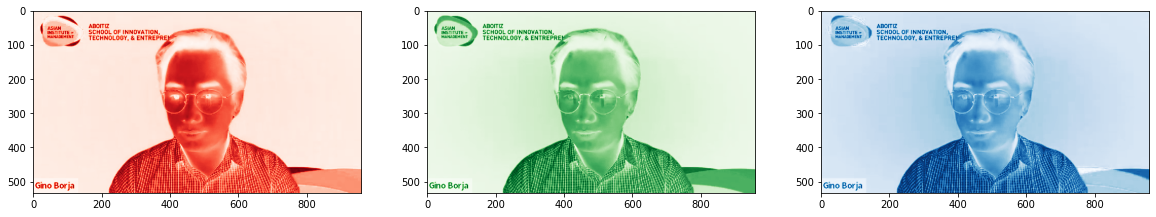

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
cmaps = ['Reds', 'Greens', 'Blues']

for i, ax in enumerate(axs):
    ax.imshow(gino1[:,:,i], cmap=cmaps[i])

## Near, Far, Wherever You Are

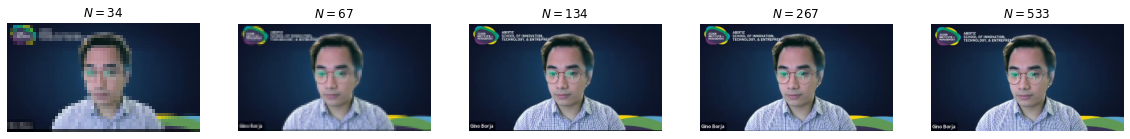

In [27]:
factors = 2**np.arange(0, 5)
fig, ax = plt.subplots(1, len(factors), figsize=(20, 5))
for i,factor in enumerate(factors):
    image = downscale_local_mean(gino1, 
                                 factors=(factor, factor, 1)).astype(int)
    ax_num = len(factors) - i - 1
    ax[ax_num].imshow(image)
    ax[ax_num].set_title(r'$N=%d$' % image.shape[0])
    ax[ax_num].axis('off')